# Quality Estimation baseline models: Evaluation on Translation Validation Data

**Author:** Jessica Silva

**Keywords:** Quality Estimation; Machine Translation

**Date:** 25/11/2020

### Goals

- Explore the Translation Validation data available on DC Platform
- Evaluate our baseline Quality Estimation models
- Compare and report results in the testset

### Main Outcomes (on going)

**Imports**

In [1089]:
import os
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import sqrt
from pathlib import Path
from sentence_transformers import SentenceTransformer, util, evaluation, LoggingHandler
from sklearn import metrics

**Functions**

In [1090]:
def get_class(score, threshold):
    if score>threshold:
        return True
    else:
        return False

**Parameters**

In [1091]:
project_dir = Path("../")
path_files = project_dir.joinpath('data', 'processed', 'validation')

**Import the baseline model v1**

In [1092]:
model_baseline_v1 = SentenceTransformer('distiluse-base-multilingual-cased-v1')

**Import the baseline model v2**

In [1093]:
model_baseline_v2 = SentenceTransformer('distiluse-base-multilingual-cased-v2')

**Custom Model**

In [1094]:
model_custom = SentenceTransformer('../models/all_languages/2021-02-11_01-00-47-0.99split/model')

**Load the test set**

In [1095]:
test = pd.read_csv(os.path.join(path_files, 'jobs-test-1/test.csv'))

In [1096]:
test

,language_pair,source,target,accuracy,jobid,type
0,ru-en,Наш автосервис находится на пересечении МКАД и...,Our car service is at the crossroad of MKAD an...,True,4934,test
1,ru-en,МЭТТ ДЖЕЙКОБСОН: «Когда городские ребята перес...,MATT JACOBSON: «Urban guys realy go wild when ...,True,4934,test
2,ru-en,Накопленный купонный доход (в валюте):,Accumulated coupon income (in currency):,True,4934,test
3,ru-en,Накопленный купонный доход (в валюте):,Accumulated coupon income (in currency):,True,4934,test
4,ru-en,Мои любимые музыкальные исполнители: Стас Миха...,"My favorite performers are Stas Mikhailov, Iri...",True,4934,test
...,...,...,...,...,...,...
6663,jp-zh,通信業者 関係あります？ それ,这跟通讯部门有什么关系啊？,True,6741,test
6664,jp-zh,GANTZ 良かったです！！,GANTZ很好看！！,True,6741,test
6665,jp-zh,環境は どう？,环境怎么样？,True,6741,test
6666,jp-zh,なるほどね。,确实是这样啊。,True,6741,test


**Predict the score for each test set sentence pair**

In [245]:
#Balanced
scores_baseline_v1 = []
tags = []
for index, row in test.iterrows():
    source_embedding_baseline_v1 = model_baseline_v1.encode(row['source'], convert_to_tensor=True)
    target_embedding_baseline_v1 = model_baseline_v1.encode(row['target'], convert_to_tensor=True)
    score_baseline_v1 = util.pytorch_cos_sim(source_embedding_baseline_v1, target_embedding_baseline_v1)[0]
    score_baseline_v1 = ("%.4f" % (score_baseline_v1))
    scores_baseline_v1.append(score_baseline_v1)

In [1097]:
#Imbalanced
scores_baseline_v1 = []
tags = []
for index, row in test.iterrows():
    source_embedding_baseline_v1 = model_baseline_v1.encode(row['source'], convert_to_tensor=True)
    target_embedding_baseline_v1 = model_baseline_v1.encode(row['target'], convert_to_tensor=True)
    score_baseline_v1 = util.pytorch_cos_sim(source_embedding_baseline_v1, target_embedding_baseline_v1)[0]
    score_baseline_v1 = ("%.4f" % (1 - score_baseline_v1))
    scores_baseline_v1.append(score_baseline_v1)

In [ ]:
#Balanced
scores_baseline_v2 = []
tags = []
for index, row in test.iterrows():    
    source_embedding_baseline_v2 = model_baseline_v2.encode(row['source'], convert_to_tensor=True)
    target_embedding_baseline_v2 = model_baseline_v2.encode(row['target'], convert_to_tensor=True)
    score_baseline_v2 = util.pytorch_cos_sim(source_embedding_baseline_v2, target_embedding_baseline_v2)[0]
    score_baseline_v2 = ("%.4f" % (score_baseline_v2))
    scores_baseline_v2.append(score_baseline_v2)

In [1098]:
#Imbalanced
scores_baseline_v2 = []
tags = []
for index, row in test.iterrows():    
    source_embedding_baseline_v2 = model_baseline_v2.encode(row['source'], convert_to_tensor=True)
    target_embedding_baseline_v2 = model_baseline_v2.encode(row['target'], convert_to_tensor=True)
    score_baseline_v2 = util.pytorch_cos_sim(source_embedding_baseline_v2, target_embedding_baseline_v2)[0]
    score_baseline_v2 = ("%.4f" % (1 - score_baseline_v2))
    scores_baseline_v2.append(score_baseline_v2)

In [ ]:
#Balanced
scores_custom = []
tags = []
for index, row in test.iterrows():    
    source_embedding_custom = model_custom.encode(row['source'], convert_to_tensor=True)
    target_embedding_custom = model_custom.encode(row['target'], convert_to_tensor=True)
    score_custom = util.pytorch_cos_sim(source_embedding_custom, target_embedding_custom)[0]
    score_custom = ("%.4f" % (score_custom))
    scores_custom.append(score_custom)

In [1099]:
#Imbalanced Custom
scores_custom = []
tags = []
for index, row in test.iterrows():    
    source_embedding_custom = model_custom.encode(row['source'], convert_to_tensor=True)
    target_embedding_custom = model_custom.encode(row['target'], convert_to_tensor=True)
    score_custom = util.pytorch_cos_sim(source_embedding_custom, target_embedding_custom)[0]
    score_custom = ("%.4f" % (1 - score_custom))
    scores_custom.append(score_custom)

In [1100]:
#Accuracy Imbalanced
accuracy_imb = []
for index, row in test.iterrows():
    if row['accuracy'] is False:
        accuracy_imb.append("True")
    if row['accuracy'] is True:
        accuracy_imb.append("False")

print(len(accuracy_imb))

6668


**Insert the new columns into the test set**

In [1101]:
test.insert(loc=0, column='score_baseline_v1', value=scores_baseline_v1)

In [1102]:
test.insert(loc=0, column='score_baseline_v2', value=scores_baseline_v2)

In [1103]:
test.insert(loc=0, column='scores_custom', value=scores_custom)

In [1104]:
test.insert(loc=0, column='accuracy_imb', value=accuracy_imb)

In [1105]:
test

,accuracy_imb,scores_custom,score_baseline_v2,score_baseline_v1,language_pair,source,target,accuracy,jobid,type
0,False,0.0597,0.2787,0.2856,ru-en,Наш автосервис находится на пересечении МКАД и...,Our car service is at the crossroad of MKAD an...,True,4934,test
1,False,0.0484,0.1338,0.2136,ru-en,МЭТТ ДЖЕЙКОБСОН: «Когда городские ребята перес...,MATT JACOBSON: «Urban guys realy go wild when ...,True,4934,test
2,False,0.0127,0.1059,0.1317,ru-en,Накопленный купонный доход (в валюте):,Accumulated coupon income (in currency):,True,4934,test
3,False,0.0127,0.1059,0.1317,ru-en,Накопленный купонный доход (в валюте):,Accumulated coupon income (in currency):,True,4934,test
4,False,0.0310,0.0901,0.1453,ru-en,Мои любимые музыкальные исполнители: Стас Миха...,"My favorite performers are Stas Mikhailov, Iri...",True,4934,test
...,...,...,...,...,...,...,...,...,...,...
6663,False,0.0318,0.2978,0.2742,jp-zh,通信業者 関係あります？ それ,这跟通讯部门有什么关系啊？,True,6741,test
6664,False,0.0187,0.3276,0.2226,jp-zh,GANTZ 良かったです！！,GANTZ很好看！！,True,6741,test
6665,False,0.0137,0.0327,0.0796,jp-zh,環境は どう？,环境怎么样？,True,6741,test
6666,False,0.0195,0.3248,0.2613,jp-zh,なるほどね。,确实是这样啊。,True,6741,test


### Evaluation: Baseline v1 x Baseline v2

**Create numpy arrays for the ground truth and models predicitons**

In [1106]:
#accuracy = test['accuracy'].apply(str).values.tolist()
accuracy = test['accuracy_imb'].apply(str).values.tolist()
score_baseline_v1 = test['score_baseline_v1'].values.tolist()
score_baseline_v2 = test['score_baseline_v2'].values.tolist()
score_custom = test['scores_custom'].values.tolist()

#Balanced scenario
#Good Translation = True = 1
#Bad Translation = False = 0
label2int = {'False': 0, 'True': 1}

y = np.array([label2int[label] for label in accuracy])
pred_baseline_v1 = np.array([float(score_v1) for score_v1 in score_baseline_v1])
pred_baseline_v2 = np.array([float(score_v2) for score_v2 in score_baseline_v2])
pred_custom = np.array([float(score_c) for score_c in score_custom])

**AUC - ROC Curve**

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

* True Positive Rate
* False Positive Rate

True Positive Rate (TPR) is a synonym for recall and is therefore defined as follows:
* TPR = TP / TP + FN

False Positive Rate (FPR) is defined as follows:
* FPR = FP / FP + TN

Here we have the AUC - ROC curve calculations (TPR, FPR, Thresholds) for our fine-tuned model and our baseline.

**Baseline v1 model**

In [1107]:
fpr_baseline_v1, tpr_baseline_v1, thresholds_baseline_v1 = metrics.roc_curve(y, pred_baseline_v1, pos_label=1)
roc_auc_baseline_v1 = metrics.auc(fpr_baseline_v1, tpr_baseline_v1)

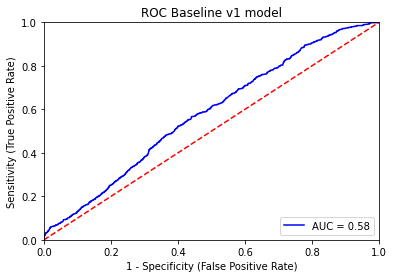

In [1108]:
plt.title('ROC Baseline v1 model')
plt.plot(fpr_baseline_v1, tpr_baseline_v1, 'b', label = 'AUC = %0.2f' % roc_auc_baseline_v1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Sensitivity (True Positive Rate)')
plt.xlabel('1 - Specificity (False Positive Rate)')
plt.show()

**Baseline v2 model**

In [1109]:
fpr_baseline_v2, tpr_baseline_v2, thresholds_baseline_v2 = metrics.roc_curve(y, pred_baseline_v2, pos_label=1)
roc_auc_baseline_v2 = metrics.auc(fpr_baseline_v2, tpr_baseline_v2)

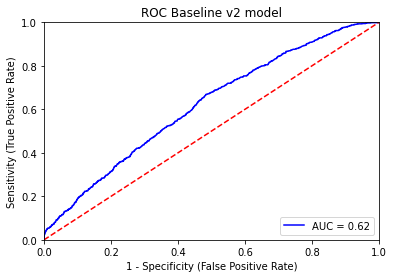

In [1110]:
plt.title('ROC Baseline v2 model')
plt.plot(fpr_baseline_v2, tpr_baseline_v2, 'b', label = 'AUC = %0.2f' % roc_auc_baseline_v2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Sensitivity (True Positive Rate)')
plt.xlabel('1 - Specificity (False Positive Rate)')
plt.show()

In [1111]:
fpr_custom, tpr_custom, thresholds_custom = metrics.roc_curve(y, pred_custom, pos_label=1)
roc_auc_custom = metrics.auc(fpr_custom, tpr_custom)

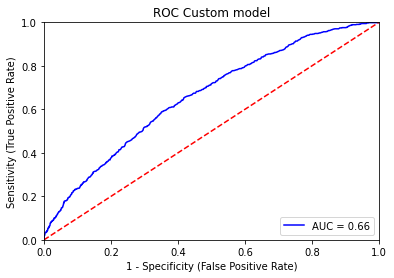

In [1112]:
plt.title('ROC Custom model')
plt.plot(fpr_custom, tpr_custom, 'b', label = 'AUC = %0.2f' % roc_auc_custom)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Sensitivity (True Positive Rate)')
plt.xlabel('1 - Specificity (False Positive Rate)')
plt.show()

In the AUC - ROC Curve, the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. The red line is a ramdom classifier.

A larger area under the curve (AUC) is usually better.

**Precision Recall Curve**

**Baseline v1 model**

In [ ]:
prec_baseline_v1, recall_baseline_v1, _ = metrics.precision_recall_curve(y, pred_baseline_v1, pos_label=1)
pr_display_baseline_v1 = metrics.PrecisionRecallDisplay(precision=prec_baseline_v1, recall=recall_baseline_v1).plot()
average_precision = metrics.average_precision_score(y, pred_baseline_v1)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

In [ ]:
# F-MEASURE
# calculate roc curves
precision_v1, recall_v1, thresholds_v1 = metrics.precision_recall_curve(y, pred_baseline_v1)
# convert to f score
fscore_v1 = 2 * (precision_v1 * recall_v1) / (precision_v1 + recall_v1)
fscore_v1 = [a for a in fscore_v1 if ~np.isnan(a)]
# locate the index of the largest f score
ix_v1 = np.argmax(fscore_v1)
optimal_threshold_baseline_v1 = thresholds_v1[ix_v1]
print('Best Threshold=%f, F-Score=%.3f' % (optimal_threshold_baseline_v1, fscore_v1[ix_v1]))
# plot the roc curve for the model
no_skill = len(y[y==1]) / len(y)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall_v1, precision_v1, marker='.', label='v1')
plt.scatter(recall_v1[ix_v1], precision_v1[ix_v1], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

In [ ]:
prec_baseline_v2, recall_baseline_v2, _ = metrics.precision_recall_curve(y, pred_baseline_v2, pos_label=1)
pr_display_baseline_v2 = metrics.PrecisionRecallDisplay(precision=prec_baseline_v2, recall=recall_baseline_v2).plot()
average_precision = metrics.average_precision_score(y, pred_baseline_v2)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

In [ ]:
# F-MEASURE
# calculate roc curves
precision_v2, recall_v2, thresholds_v2 = metrics.precision_recall_curve(y, pred_baseline_v2)
# convert to f score
fscore_v2 = 2 * (precision_v2 * recall_v2) / (precision_v2 + recall_v2)
fscore_v2 = [a for a in fscore_v2 if ~np.isnan(a)]
# locate the index of the largest f score
ix_v2 = np.argmax(fscore_v2)
optimal_threshold_baseline_v2 = thresholds_v2[ix_v2]
print('Best Threshold=%f, F-Score=%.3f' % (optimal_threshold_baseline_v2, fscore_v2[ix_v2]))
# plot the roc curve for the model
no_skill = len(y[y==1]) / len(y)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall_v2, precision_v2, marker='.', label='v2')
plt.scatter(recall_v2[ix_v2], precision_v2[ix_v2], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate.

### The optimal threshold

**The Optimal threshold maximizes the difference between the True Positive Rate and the False Positive Rate**

In [ ]:
optimal_idx_baseline_v1 = np.argmax(tpr_baseline_v1 - fpr_baseline_v1)
optimal_threshold_baseline_v1 = thresholds_baseline_v1[optimal_idx_baseline_v1]
print("Baseline v1 model Threshold value is:", optimal_threshold_baseline_v1)

In [ ]:
# calculate the g-mean for each threshold
gmeans_v1 = sqrt(tpr_baseline_v1 * (1-fpr_baseline_v1))
# locate the index of the largest g-mean
ix_v1 = np.argmax(gmeans_v1)
optimal_threshold_baseline_v1 = thresholds_baseline_v1[ix_v1]
print('Best Threshold=%f, G-Mean=%.3f' % (optimal_threshold_baseline_v1, gmeans_v1[ix_v1]))

In [ ]:
plt.title('ROC Baseline v1 model')
plt.plot(fpr_baseline_v1, tpr_baseline_v1, 'b', label = 'AUC = %0.2f' % roc_auc_baseline_v1)
plt.scatter(fpr_baseline_v1[ix_v1], tpr_baseline_v1[ix_v1], marker='o', color='black', label='Best')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Sensitivity (True Positive Rate)')
plt.xlabel('1 - Specificity (False Positive Rate)')
plt.show()

In [ ]:
optimal_idx_baseline_v2 = np.argmax(tpr_baseline_v2 - fpr_baseline_v2)
optimal_threshold_baseline_v2 = thresholds_baseline_v2[optimal_idx_baseline_v2]
print("Baseline v2 model Threshold value is:", optimal_threshold_baseline_v2)

In [ ]:
# calculate the g-mean for each threshold
gmeans_v2 = sqrt(tpr_baseline_v2 * (1-fpr_baseline_v2))
# locate the index of the largest g-mean
ix_v2 = np.argmax(gmeans_v2)
optimal_threshold_baseline_v2 = thresholds_baseline_v1[ix_v2]
print('Best Threshold=%f, G-Mean=%.3f' % (optimal_threshold_baseline_v2, gmeans_v2[ix_v2]))

In [ ]:
plt.title('ROC Baseline v2 model')
plt.plot(fpr_baseline_v2, tpr_baseline_v2, 'b', label = 'AUC = %0.2f' % roc_auc_baseline_v2)
plt.scatter(fpr_baseline_v2[ix_v2], tpr_baseline_v2[ix_v2], marker='o', color='black', label='Best')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Sensitivity (True Positive Rate)')
plt.xlabel('1 - Specificity (False Positive Rate)')
plt.show()

### Classifier

Here we will classify the sentence pairs that have a **accuracy** label in our test set (accuracy: **Is the meaning of the source conveyed?**) in a binary way (**true** or **false**). **True** if the cosine similarity score is above the **optimal threshold** and **False** otherwise.

In [ ]:
tags_baseline_v1 = []
tags_baseline_v2 = []
for index, row in test.iterrows():  
    tag_baseline_v1 = get_class(float(row['score_baseline_v1']), optimal_threshold_baseline_v1)
    tags_baseline_v1.append(tag_baseline_v1)
    tag_baseline_v2 = get_class(float(row['score_baseline_v2']), optimal_threshold_baseline_v2)
    tags_baseline_v2.append(tag_baseline_v2)

Insert the new columns into the test set

In [ ]:
test.insert(loc=0, column='accuracy_baseline_v1', value=tags_baseline_v1)
test.insert(loc=0, column='accuracy_baseline_v2', value=tags_baseline_v2)

In [ ]:
test

Here, we will use the scikit-learn library to calculate some common metrics, such as Accuracy, Recall and F1 score.

Binary Classes
- False: bad translation
- True: good translation

In [ ]:
#test['accuracy'] = test['accuracy'].apply(str)
test['accuracy_imb'] = test['accuracy_imb'].apply(str)
test['accuracy_baseline_v1'] = test['accuracy_baseline_v1'].apply(str)
test['accuracy_baseline_v2'] = test['accuracy_baseline_v2'].apply(str)

#accuracy = test['accuracy'].values.tolist()
accuracy = test['accuracy_imb'].values.tolist()
accuracy_baseline_v1 = test['accuracy_baseline_v1'].values.tolist()
accuracy_baseline_v2 = test['accuracy_baseline_v2'].values.tolist()

#target_names = ['bad translation', 'good translation']
target_names = ['good translation', 'bad translation']

**Confusion Matrix**

The confusion matrix shows us how the classification occurred in each class and how many are:

- True Positives (model predicted **1 = True = good translation** and it is the right class)
- True Negatives (model predicted **0 = False = bad translation** and it is the right class)
- False Positives (model predicted **1 = True = good translation** and it is not the right class)
- False Negatives (model predicted **0 = False = bad translation** and it is not the right class).

Imbalanced

- True Positives (model predicted **1 = True = bad translation** and it is the right class)
- True Negatives (model predicted **0 = False = good translation** and it is the right class)
- False Positives (model predicted **1 = True = bad translation** and it is not the right class)
- False Negatives (model predicted **0 = False = good translation** and it is not the right class).

**Baseline v1 model**

In [ ]:
print(metrics.classification_report(accuracy, accuracy_baseline_v1, target_names=target_names))

In [ ]:
metrics.precision_score(accuracy, accuracy_baseline_v1, average='weighted')

In [ ]:
metrics.recall_score(accuracy, accuracy_baseline_v1, average='weighted')

In [ ]:
metrics.f1_score(accuracy, accuracy_baseline_v1, average='weighted')

In [ ]:
cm = metrics.confusion_matrix(accuracy, accuracy_baseline_v1)
cm_display = metrics.ConfusionMatrixDisplay(cm).plot()

In [ ]:
tn_baseline_v1, fp_baseline_v1, fn_baseline_v1, tp_baseline_v1 = metrics.confusion_matrix(accuracy, accuracy_baseline_v1).ravel()
print("True positives: ", tp_baseline_v1)
print("True negatives: ", tn_baseline_v1)
print("False positives: ", fp_baseline_v1)
print("False negatives: ", fn_baseline_v1)

Recall or Sensitivity (TPR)

The good translation recall is 0.44 (143/(179+143)), meaning that the model correctly predicts that a translation is good 44% of the time.

Specificity (TNR)

The bad translation recall is 0.74 (239/(83+239)), meaning that the model correctly predicts that a translation is bad 74% of the time.

Precision

The bad translation precision is 0.57 (239/(179+239)). In other words, when the model predicted a bad translation, it was correct 57% of the time. 

The good translation precision is 0.63 (143/(83+143)). In other words, when the model predicted a good translation, it was correct 63% of the time. 

**Baseline v2 model**

In [ ]:
print(metrics.classification_report(accuracy, accuracy_baseline_v2, target_names=target_names))

In [ ]:
metrics.precision_score(accuracy, accuracy_baseline_v2, average='weighted')

In [ ]:
metrics.recall_score(accuracy, accuracy_baseline_v2, average='weighted')

In [ ]:
metrics.f1_score(accuracy, accuracy_baseline_v2, average='weighted')

In [ ]:
cm = metrics.confusion_matrix(accuracy, accuracy_baseline_v1)
cm_display = metrics.ConfusionMatrixDisplay(cm).plot()

In [ ]:
tn_baseline_v2, fp_baseline_v2, fn_baseline_v2, tp_baseline_v2 = metrics.confusion_matrix(accuracy, accuracy_baseline_v2).ravel()
print("True positives: ", tp_baseline_v2)
print("True negatives: ", tn_baseline_v2)
print("False positives: ", fp_baseline_v2)
print("False negatives: ", fn_baseline_v2)